In [1]:
from utils.featurizer import SentinelFeaturizer
import numpy as np

## Read initial raster image

In [2]:
featurizer = SentinelFeaturizer(image='sentinel_data_4_bands.tif')

## Plot 4 random tiles from image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


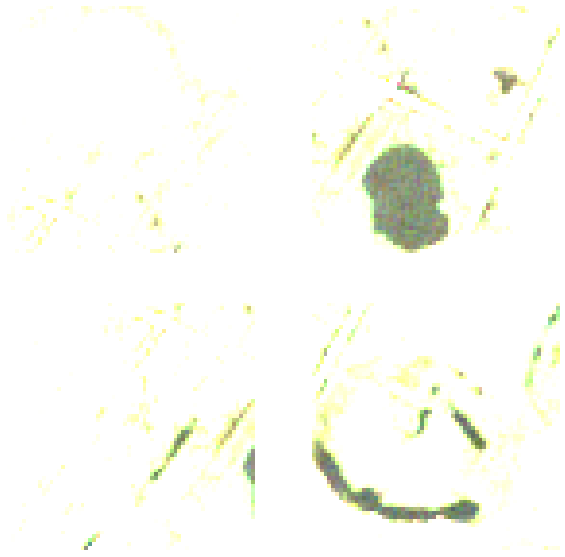

In [3]:
featurizer.plot(tile_size=64)

## We can easily normalize data (by each channel) and get normalization statistics

In [4]:
norm_dict = featurizer.normalize()
for k, v in norm_dict.items():
    print(k, ':', v)

mean : [568.1770142471137, 616.8545197740114, 363.6725927290592, 2508.0249017440433]
std : [232.4868455134588, 197.94165601704177, 161.4971492455886, 540.9882670151393]


## Lets plot again: the data is now normalized

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


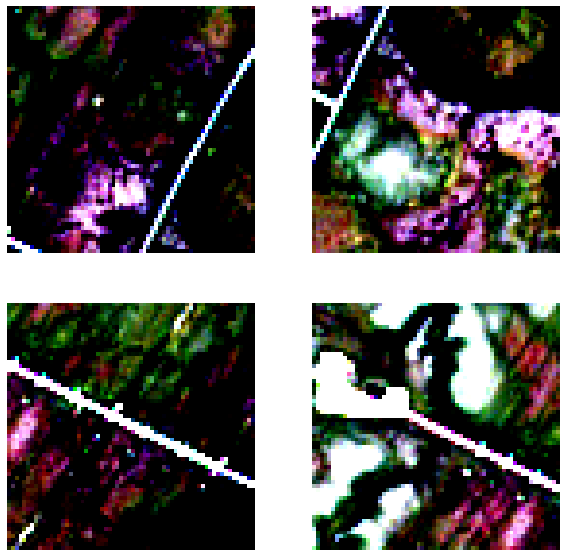

In [5]:
featurizer.plot(tile_size=64)

## We can get image as .image attribute from featurizer

In [6]:
img = featurizer.image
print(img.shape)

(138, 236, 4)


## Lets check that image is normalized

In [7]:
print(np.mean(img, axis=(0, 1)))
print(np.std(img, axis=(0, 1)))

[ 2.33880439e-16 -2.59188397e-16 -3.49075282e-17 -9.77410789e-17]
[1. 1. 1. 1.]


## There is also useful metadata contained in featurizer

In [8]:
print(f'Height: {featurizer.height}')
print(f'Width: {featurizer.width}')
print(f'CRS: {featurizer.crs}')
print(f'Transform: {featurizer.transform}')

Height: 138
Width: 236
CRS: EPSG:32643
Transform: | 10.00, 0.00, 503860.00|
| 0.00,-10.00, 7495200.00|
| 0.00, 0.00, 1.00|


## Finally, lets extract features for each pixel using 3x3 sliding window
So each pixel (except the boundary ones) will have 3 x 3 x n_channels features = 3x3x4 = 36 features

Such features can be directly used for fitting ML models 

In [9]:
X = featurizer.get_features(window_size=3)
print(X.shape)

(31824, 36)
